In [2]:
from pymongo import MongoClient


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import binance
from datetime import datetime
from dateutil import parser
pd.options.display.float_format="{:,.1f}".format

In [11]:
#df_sygnal_data = pd.read_csv("sygnals_operations.csv")
df_sygnal_data:pd.DataFrame = pd.read_pickle("sygnals_operations.pickle")

In [3]:
client = MongoClient('localhost', 27017)
db=client["Back_prueba"]
#db.drop_collection()
data= db.signals.find()
list_data = list(data)


In [9]:
#dbs=client.database_names()
#for db in dbs[7:]:
#    client.drop_database(db)


/tmp/ipykernel_21129/1522792818.py:1: DeprecationWarning: database_names is deprecated. Use list_database_names instead.
  dbs=client.database_names()


In [4]:
df = pd.DataFrame(list_data)


In [16]:
df.to_pickle('sygnals_operations.pickle',)


In [5]:
df[["symbol","currencies", "channel"]]


,symbol,currencies,channel
0,ATOMBTC,"{'primary': 'ATOM', 'segundary': 'BTC'}",Crypto Futures Spot Signals😘
1,KAVAUSDT,"{'primary': 'KAVA', 'segundary': 'USDT'}",Crypto Futures Spot Signals😘
2,DEXEUSDT,"{'primary': 'DEXE', 'segundary': 'USDT'}",Crypto Futures Spot Signals😘
3,APEUSDT,"{'primary': 'APE', 'segundary': 'USDT'}",Crypto Futures Spot Signals😘
4,CAKEBTC,"{'primary': 'CAKE', 'segundary': 'BTC'}",Crypto Futures Spot Signals😘
...,...,...,...
115,ADAUSDT,"{'primary': 'ADA', 'segundary': 'USDT'}",Federal Russian Insiders VIP Free
116,TRXUSDT,"{'primary': 'TRX', 'segundary': 'USDT'}",Federal Russian Insiders VIP Free
117,BCHUSDT,"{'primary': 'BCH', 'segundary': 'USDT'}",Federal Russian Insiders VIP Free
118,ETHUSDT,"{'primary': 'ETH', 'segundary': 'USDT'}",Federal Russian Insiders VIP Free


In [6]:
df.columns

Index(['_id', 'symbol_message', 'symbol', 'currencies', 'is_future', 'is_long',
       'leverage', 'percent_amount', 'is_entry_market', 'entry_targets',
       'take_profit_targets', 'stop_targets', 'trailing_configuration',
       'quantity', 'quantity_take_profit', 'free', 'timeStamp_Tg', 'date',
       'message_id', 'channel', 'channel_id'],
      dtype='object')

In [27]:
mask=df["symbol_message"].str.contains("/")
mask
df=df[mask]

In [50]:
df.channel.value_counts()


Crypto Futures Spot Signals😘         300
𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔                   300
Federal Russian Insiders VIP Free    300
Bitcoin Bullets VIP Free             235
Name: channel, dtype: int64

In [21]:
symbols_count = df[["symbol", "channel"]].value_counts().sort_values(ascending=False)
important_symbol = symbols_count.head(40)
type(important_symbol)


pandas.core.series.Series

In [22]:
symbols_count = df[["symbol", "channel"]]
important_symbol = symbols_count
important_symbol.groupby("channel").describe()


symbol                     
                                   count unique      top freq
channel                                                      
Bitcoin Bullets VIP Free             229     59  LTCUSDT   14
Crypto Futures Spot Signals😘         300    173  BTCUSDT   16
Federal Russian Insiders VIP Free    296     56  ETHUSDT   19
𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔                   300     96  BELUSDT   15

<AxesSubplot:>

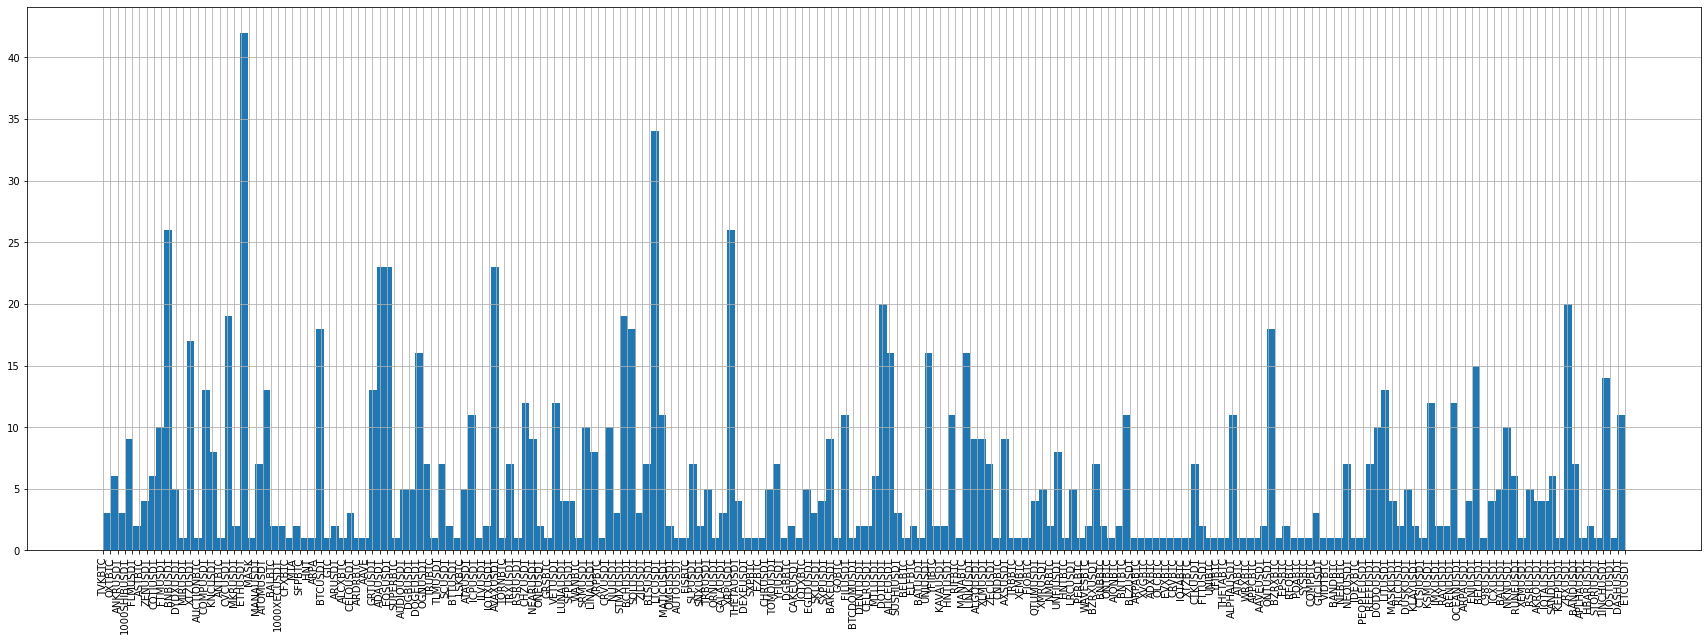

In [20]:
important_symbol["symbol"].hist(figsize=(30, 10),xrot=90, bins=200,)


In [12]:
#plt.figure(figsize=(50, 10))
#plt.xticks(rotation=90)
#sns.histplot(data=important_symbol, x="symbol",hue="channel",palette="Set1")


In [52]:
df[["timeStamp_Tg","message_id","channel_id","date"]]


,timeStamp_Tg,message_id,channel_id,date
0,1647354765,5316,-1001381384148,2022-03-15 10:32:45
1,1646753327,5244,-1001381384148,2022-03-08 11:28:47
2,1646653781,5228,-1001381384148,2022-03-07 07:49:41
3,1645112197,5092,-1001381384148,2022-02-17 11:36:37
4,1645031424,5081,-1001381384148,2022-02-16 13:10:24
...,...,...,...,...
1130,1627755081,114,-1001277174399,2021-07-31 14:11:21
1131,1627603382,97,-1001277174399,2021-07-29 20:03:02
1132,1627583234,95,-1001277174399,2021-07-29 14:27:14
1133,1627543095,88,-1001277174399,2021-07-29 03:18:15


In [31]:
from datetime import timedelta, datetime, time

In [66]:
#str(datetime(2020,3,1,1,30,0)-h4)
new=datetime.utcfromtimestamp(1647354765)
old=datetime.fromtimestamp(1647354765)

base=(new-old).total_seconds()/60

base

240.0

In [64]:
import math

In [74]:
h1=60
math.ceil(base/h1)

4

In [17]:
h4 = timedelta(hours=4)
h4

datetime.timedelta(seconds=14400)

In [13]:
df2["datetime"]= pd.to_datetime(df2["timeStamp_Tg"], unit="s")
df2["datetime"]

0      2022-03-15 14:32:45
1      2022-03-08 15:28:47
2      2022-03-07 11:49:41
3      2022-02-17 15:36:37
4      2022-02-16 17:10:24
               ...        
1120   2021-07-30 00:03:02
1121   2021-07-29 18:27:14
1122   2021-07-29 07:18:15
1123   2021-07-27 18:22:45
1124   2021-07-26 04:36:32
Name: datetime, Length: 1125, dtype: datetime64[ns]

In [14]:
df2[["timeStamp_Tg","message_id","channel_id","datetime"]]

,timeStamp_Tg,message_id,channel_id,datetime
0,1647354765,5316,-1001381384148,2022-03-15 14:32:45
1,1646753327,5244,-1001381384148,2022-03-08 15:28:47
2,1646653781,5228,-1001381384148,2022-03-07 11:49:41
3,1645112197,5092,-1001381384148,2022-02-17 15:36:37
4,1645031424,5081,-1001381384148,2022-02-16 17:10:24
...,...,...,...,...
1120,1627603382,97,-1001277174399,2021-07-30 00:03:02
1121,1627583234,95,-1001277174399,2021-07-29 18:27:14
1122,1627543095,88,-1001277174399,2021-07-29 07:18:15
1123,1627410165,66,-1001277174399,2021-07-27 18:22:45


In [21]:
df2["datetime"]=df2["datetime"].apply(lambda x : x - h4)


In [22]:
df2[["timeStamp_Tg","message_id","channel_id","datetime"]]

,timeStamp_Tg,message_id,channel_id,datetime
0,1647354765,5316,-1001381384148,2022-03-15 10:32:45
1,1646753327,5244,-1001381384148,2022-03-08 11:28:47
2,1646653781,5228,-1001381384148,2022-03-07 07:49:41
3,1645112197,5092,-1001381384148,2022-02-17 11:36:37
4,1645031424,5081,-1001381384148,2022-02-16 13:10:24
...,...,...,...,...
1120,1627603382,97,-1001277174399,2021-07-29 20:03:02
1121,1627583234,95,-1001277174399,2021-07-29 14:27:14
1122,1627543095,88,-1001277174399,2021-07-29 03:18:15
1123,1627410165,66,-1001277174399,2021-07-27 14:22:45


In [ ]:
if len(data) > 0:  
        old = parser.parse(
            data["timestamp"].iloc[-1]
            )

In [ ]:
if len(data)>0:
    old= parser.parse(
        data["timestamp"].iloc[-1]
    )

In [31]:
pd.options.display.float_format="{:,.1f}".format
pd.options.display.precision = 1

In [84]:
df_symbol:pd.DataFrame=pd.read_pickle("../../BTCUSDT-5m-data.pickle")

In [5]:
df_sygnal_data.iloc[1]#["entry_targets"][1]

_id                                                625dcff219230c849ec300b9
symbol_message                                                      OXT/BTC
symbol                                                               OXTBTC
currencies                       {'primary': 'OXTBTC', 'segundary': 'USDT'}
is_future                                                              True
is_long                                                                True
leverage                  {'type': 'cross default', 'is_cross': True, 'p...
percent_amount                                                            0
is_entry_market                                                       False
entry_targets                                          [5.82e-06, 5.43e-06]
take_profit_targets                          [5.99e-06, 6.17e-06, 6.34e-06]
stop_targets                                                     [5.35e-06]
trailing_configuration                        {'quantity': 0, 'percent': 2}
quantity    

In [139]:
# %%timeit 3.46 ms
mask:pd.Series=BTCUSDT_date["date_myUTC"]
mask=mask.between("2022-03-08","2022-04-08")
btc_by_date=BTCUSDT_date[mask]
btc_by_date.iloc[1]
btc_by_date.shape


(8929, 12)

In [140]:
# %%timeit 394 ms

mask:pd.Series=BTCUSDT_date["date_myUTC"]
mask=mask.isin(pd.date_range(start="2022-03-08 00:00.00",end=str(BTCUSDT_date["date_myUTC"].iloc[-1]),freq="1s"))
btc_by_date=BTCUSDT_date[mask]
btc_by_date.iloc[1]
btc_by_date.shape


(12305, 12)

In [141]:
# %%timeit 115 ms

mask:pd.Series=BTCUSDT_date["date_myUTC"]
mask=mask.isin(pd.date_range(start="2022-03-08 00:00.00",end="2022-04-08 00:00.00",freq="1s"))
btc_by_date=BTCUSDT_date[mask]
btc_by_date.iloc[1]
btc_by_date.shape


(8929, 12)

In [142]:
# %%timeit 4.24 ms
mask=(BTCUSDT_date["date_myUTC"] > 
pd.to_datetime("2022-03-08 00:00.00")) & (BTCUSDT_date["date_myUTC"] <= 
pd.to_datetime("2022-04-08 00:00.00"))
btc_by_date=BTCUSDT_date[mask]
btc_by_date.iloc[1]
btc_by_date.shape

(8928, 12)

In [146]:
def t(la_t):
    if la_t:
        return "la_t"
    print("aqui toy")
    return "No la_t"

t(True)

'la_t'

In [50]:
def regresar(row,iterated,returned):
    l=[]
    for row in iterated:
        l.append(returned)
    return l


# Probando recorrer filas

In [58]:
%%timeit
l=[]
l.append(df_sygnal_data.apply(lambda row: row["date"],axis=1))
l

13.2 ms ± 56.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [59]:
%%timeit
#for row in df_sygnal_data.itertuples():
#    print(row.date)
regresar(row,df_sygnal_data.itertuples(),row.date)


5.14 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [60]:
%%timeit
#for index, row in df_sygnal_data.iterrows():
#    print(row.date)
regresar((index,row),df_sygnal_data.iterrows(),row.date)    

35.4 ms ± 479 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [62]:
%%timeit
#for i in range(len(df_sygnal_data)):
#    print(df_sygnal_data.loc[i,"date"])
regresar(i,range(len(df_sygnal_data)),df_sygnal_data.loc[i,"date"])

92.9 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [87]:
df_symbol2=df_symbol.copy()
df_symbol2[["open","high","low","close"]]=df_symbol2[["open","high","low","close"]].astype(float)
df_symbol2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31361 entries, 1640995200000 to 1650403200000
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   open         31361 non-null  float64       
 1   high         31361 non-null  float64       
 2   low          31361 non-null  float64       
 3   close        31361 non-null  float64       
 4   volume       31361 non-null  object        
 5   close_time   31361 non-null  int64         
 6   quote_av     31361 non-null  object        
 7   trades       31361 non-null  int64         
 8   tb_base_av   31361 non-null  object        
 9   tb_quote_av  31361 non-null  object        
 10  ignore       31361 non-null  object        
 11  date_myUTC   31361 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 4.1+ MB


In [70]:
df_sygnal_data.columns

Index(['_id', 'symbol_message', 'symbol', 'currencies', 'is_future', 'is_long',
       'leverage', 'percent_amount', 'is_entry_market', 'entry_targets',
       'take_profit_targets', 'stop_targets', 'trailing_configuration',
       'quantity', 'quantity_take_profit', 'free', 'timeStamp_Tg', 'date',
       'message_id', 'channel', 'channel_id'],
      dtype='object')

In [77]:
df_symbol.iloc[0,0]
float(df_symbol.iloc[0,0])

46216.93

In [159]:
operate=43000
mask=(df_symbol2["open"])>=operate | (df_symbol2["high"]>=operate) | (df_symbol2["low"]>=operate) | (df_symbol2["close"]>=operate) & df_symbol2["date_myUTC"].between("2020-03-08","2022-04-08")
lalist:pd.DataFrame= df_symbol[mask].iloc[0:3][["date_myUTC","open"]]
ladict={k[1]:k[0] for k in lalist.to_dict("split")["data"]}
list(ladict.values())[0]

Timestamp('2021-12-31 20:00:00')

In [117]:
lalist.sort(reverse=True)
lalist

[Timestamp('2021-12-31 20:10:00'),
 Timestamp('2021-12-31 20:05:00'),
 Timestamp('2021-12-31 20:00:00')]